In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
import plotly.express as px

In [5]:
df=pd.read_excel('datasets/mic.xlsx',
                engine= 'openpyxl')
df.head(2)

Age   Sex  Ocupation Monthly income   Price  Quality  Quantity  \
0  31 - 40  Male  Research         >40, 000      5        5         5   
1  21 - 30  Male    student         <10,000      3        5         3   

   Availability  Taste  Flavours  ...  Overal satisfaction  Consistency  \
0             4      4         5  ...                    4            4   
1             4      5         5  ...                    4            4   

   Factor  Frowned          reason                            Popular   \
0   Taste       No             NaN            vanilla, lemon, and mint   
1   Taste       No  Quanity issues  vanilla, chocolate, and strawberry   

  My favorite                     Kind Preference Recommend  
0   Chocolate  More than one flavoured      agree     agree  
1   Chocolate  More than one flavoured    neutral   neutral  

[2 rows x 24 columns]

In [6]:
counts=pd.pivot_table(df,
                      index='Age',
                      aggfunc='count',
                      values='Flavours'
                     )
counts

Flavours
Age              
21 - 30        37
31 - 40         4
41 - 50         3
<=20            6

In [7]:
my_pivot=df.groupby(['Age']).size()
my_pivot=my_pivot.to_frame()
my_pivot            

0
Age        
21 - 30  37
31 - 40   4
41 - 50   3
<=20      6

In [8]:
my_pivot=my_pivot.rename(columns={0:'Cont'})
my_pivot=my_pivot.reset_index()
my_pivot

Age  Cont
0  21 - 30    37
1  31 - 40     4
2  41 - 50     3
3     <=20     6

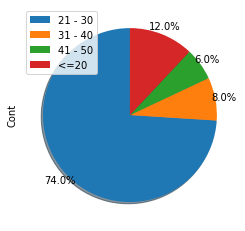

In [9]:
my_pivot['Cont'].plot(kind='pie',
                     autopct='%1.1f%%',
                     startangle=90,
                     shadow=True,
                     labels=None,
                     pctdistance=1.1
                     )
plt.legend(labels=my_pivot.Age)
plt.show()

In [10]:
my_pivot2=df.groupby(['Age','Sex']).size()
my_pivot2=my_pivot2.to_frame()
my_pivot2 
my_pivot2=my_pivot2.rename(columns={0:'Count'})
my_pivot2=my_pivot2.reset_index()
my_pivot2

Age     Sex  Count
0  21 - 30  Female     15
1  21 - 30    Male     22
2  31 - 40  Female      2
3  31 - 40    Male      2
4  41 - 50  Female      2
5  41 - 50    Male      1
6     <=20  Female      3
7     <=20    Male      3

In [14]:
fig=px.sunburst(my_pivot2,
                values='Count',
                path=['Age','Sex','Count']
               )
fig.show()

In [13]:
import plotly.express as px
data = dict(
    character=["Eve", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parent=["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve" ],
    value=[10, 14, 12, 10, 2, 6, 6, 4, 4])

fig =px.sunburst(
    data,
    names='character',
    parents='parent',
    values='value',
)
fig.show()